<a href="https://colab.research.google.com/github/AIhexNICK-MAIL-RU/ML-projects-new/blob/main/Net_ml_hw10_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

# Цель:
Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.

# Описание задания:
В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

# Этапы работы:

# 1 Сгенерируйте данные с помощью кода:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

import scipy.stats # При работе со статистикой

%matplotlib inline

In [142]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

In [143]:
x = x_data_generated
y = y_data_generated

In [144]:
display(x, y)

array([[-0.97242961, -0.15587576,  1.25770641, ...,  1.13361805,
        -1.16275475, -0.04502704],
       [-1.27335179, -0.21801935,  0.53754696, ..., -1.21184842,
        -0.35885045, -1.41912527],
       [ 0.44883049,  0.20341003, -0.94190232, ..., -0.30279677,
         0.63566855,  0.63848591],
       ...,
       [ 0.14835912,  2.18942476, -0.42394893, ...,  0.5391913 ,
         1.72907085,  1.36857048],
       [-0.23231827,  1.33186806, -0.24484452, ..., -0.66001942,
        -0.86269357, -0.20917897],
       [-0.33241981,  1.47233396,  0.28849873, ...,  2.12969273,
        -0.47933279, -0.40602632]])

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [145]:
X = np.column_stack((x,y))
print(np.transpose(X))

[[-0.97242961 -1.27335179  0.44883049 ...  0.14835912 -0.23231827
  -0.33241981]
 [-0.15587576 -0.21801935  0.20341003 ...  2.18942476  1.33186806
   1.47233396]
 [ 1.25770641  0.53754696 -0.94190232 ... -0.42394893 -0.24484452
   0.28849873]
 ...
 [-1.16275475 -0.35885045  0.63566855 ...  1.72907085 -0.86269357
  -0.47933279]
 [-0.04502704 -1.41912527  0.63848591 ...  1.36857048 -0.20917897
  -0.40602632]
 [ 0.          1.          1.         ...  1.          0.
   0.        ]]


In [146]:
# X1 = np.vstack((x,y))

# 2 Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

In [147]:
model = LogisticRegression()

model.fit(X, y)

LogisticRegression()

In [148]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean()

0.95

#### **Замечание**:
А разве не нужно делать выброку на учебную и тестовую?

# 3 Используйте статистические методы для отбора признаков:

In [149]:
from sklearn.ensemble import ExtraTreesClassifier

## a) Выберите признаки на основе матрицы корреляции.

In [150]:
coef = model.coef_
coef

array([[ 0.30341611, -0.14930544,  0.14777882, -0.1759976 ,  0.13162943,
        -0.00352383, -0.10574405,  0.04827301,  0.30302595, -0.22032311,
        -0.10453808, -0.13652153,  0.12600374, -0.20990263,  0.61960249,
         1.2065799 , -0.10247722, -0.16256873,  0.43153566, -0.37203663,
         3.18322987]])

In [151]:
# val = np.concatenate((x,np.reshape(y,(x.shape[0],1))),axis=1)

In [152]:
print('Матрица корреляции')
pd.DataFrame(X).corr()

Матрица корреляции


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.000000,-0.141102,-0.014492,0.007536,0.163672,-0.172225,-0.113226,-0.061141,-0.042664,-0.082095,...,-0.002137,-0.030686,0.110525,0.124163,0.091647,0.214226,-0.170822,-0.021527,-0.101153,0.185061
1,-0.141102,1.000000,0.144977,0.169759,0.089031,-0.121288,0.166829,0.094162,0.030771,0.012327,...,-0.045960,0.007352,-0.159544,0.058522,0.052542,-0.035687,0.175776,0.037704,0.002526,-0.007839
2,-0.014492,0.144977,1.000000,-0.018627,0.005178,0.058874,-0.078165,-0.023489,-0.077132,0.059590,...,-0.059579,0.052051,-0.198737,-0.168721,-0.187645,0.160996,0.188614,-0.104968,0.026875,-0.114186
3,0.007536,0.169759,-0.018627,1.000000,0.097767,-0.054140,-0.186737,0.242056,-0.003290,-0.028020,...,-0.105380,0.025575,0.008380,0.029389,-0.076476,0.002774,0.270814,-0.017277,0.041793,-0.081018
4,0.163672,0.089031,0.005178,0.097767,1.000000,-0.087219,-0.020106,-0.107615,0.088975,0.111289,...,-0.051726,-0.281768,0.215135,0.061515,-0.064166,-0.001992,0.061832,0.068626,0.135583,0.005429
5,-0.172225,-0.121288,0.058874,-0.054140,-0.087219,1.000000,0.047505,0.183458,0.121676,-0.009916,...,-0.045211,-0.027787,-0.231039,-0.127775,0.233688,-0.028700,-0.113921,0.153937,-0.005399,0.162802
6,-0.113226,0.166829,-0.078165,-0.186737,-0.020106,0.047505,1.000000,0.007600,-0.057640,-0.033260,...,0.052405,-0.258682,-0.065650,0.021606,0.058002,-0.022160,0.179699,-0.041386,-0.097590,0.009590
7,-0.061141,0.094162,-0.023489,0.242056,-0.107615,0.183458,0.007600,1.000000,0.074633,0.003617,...,-0.143797,0.107502,-0.040057,-0.089767,0.092020,-0.130277,0.067848,0.084828,0.027152,0.048386
8,-0.042664,0.030771,-0.077132,-0.003290,0.088975,0.121676,-0.057640,0.074633,1.000000,-0.015281,...,0.105954,0.104108,-0.013035,0.114424,0.425104,-0.040385,0.134942,0.985581,0.843380,0.353616
9,-0.082095,0.012327,0.059590,-0.028020,0.111289,-0.009916,-0.033260,0.003617,-0.015281,1.000000,...,0.032443,-0.113647,0.034236,0.105149,-0.105925,0.033807,0.071184,-0.033647,0.046136,-0.171566


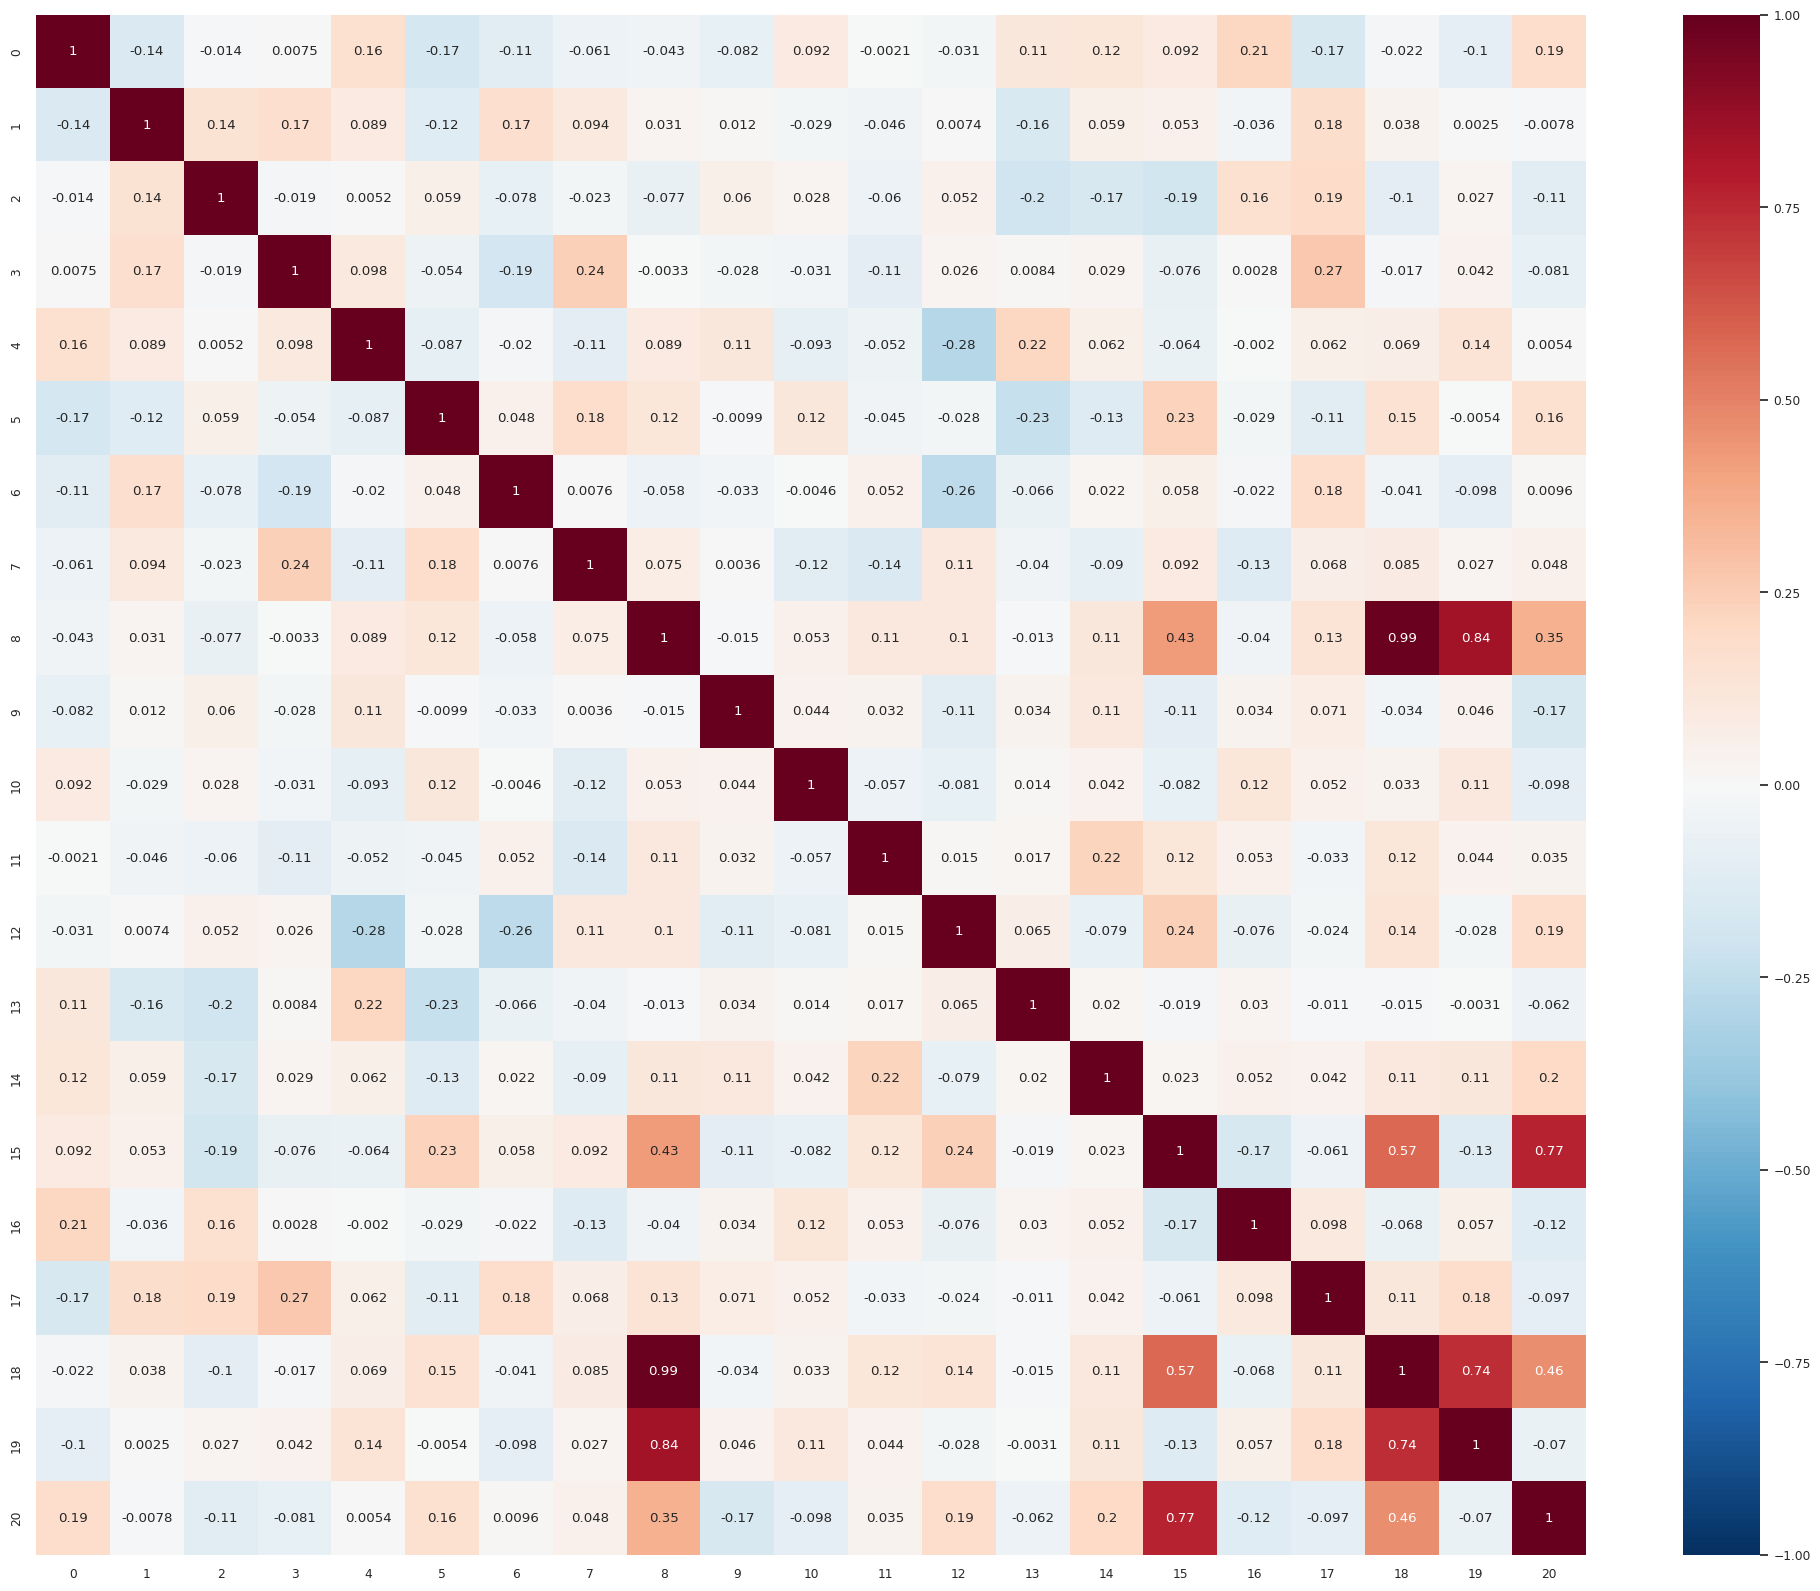

In [153]:
sns.set(font_scale=0.8)
plt.figure(figsize=(25,20))
sns.heatmap(
    pd.DataFrame(X).corr(),
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.

#### Замечание:
матрица корреляции построена, но как выбирать признаки то?
мне эта матрица ничего не говорит
разве что можно предположить то, что примерно у 8,15,18 признаков на обеих осях высокая корреляция и их нужно отсекать. А перед перезапуском были 5, 6, 7.

In [154]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [155]:
print(x.shape)
print(y.shape)
print(X.shape)

(100, 20)
(100,)
(100, 21)


In [156]:
X_start = pd.DataFrame(X).corr()

In [157]:
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
# print()
# print(to_drop)

In [158]:
# df1 = df.drop(df.columns[to_drop], axis=1)
# print()
# print(df1.head())

In [159]:
from sklearn.feature_selection import VarianceThreshold

correlated_features = set()
correlation_matrix = X_start.corr()

В приведенном выше скрипте мы создаем матрицу корреляции correlation_matrix для всех столбцов в нашем наборе данных. Мы также создали набор correlated_features, который будет содержать имена всех коррелированных функций. Затем мы пройдемся по всем столбцам в correlation_matrix и добавим столбцы со значением корреляции 0,8 в набор correlated_features, как показано ниже. Вы можете установить любое пороговое значение для корреляции.

In [160]:
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i, j]) > 0.5:
      colname = correlation_matrix.columns[i]
      correlated_features.add(colname)

Давайте посмотрим на общее количество столбцов в нашем наборе данных со значением корреляции более 0,8 с хотя бы одним другим столбцом. Выполните следующий скрипт:

Вы можете увидеть, сколько избыточной информации содержится в нашем наборе данных.

In [161]:
len(correlated_features)

5

следующий скрипт, чтобы увидеть названия этих функций:

In [162]:
print(correlated_features)

{12, 15, 18, 19, 20}


In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
new_df = pd.DataFrame(StandardScaler().fit_transform(X))

In [165]:
new_df.drop(labels=correlated_features, axis=1, inplace=True)
# test_features.drop(labels=correlated_features, axis=1, inplace=True)

In [166]:
# new_df
new_df = pd.DataFrame(new_df)
print(new_df.head(2))

         0         1         2         3         4         5         6   \
0 -0.855818 -0.150708  1.428944 -1.999940  0.262616  0.310763  2.286721   
1 -1.169445 -0.215311  0.694886 -0.827542  0.306361  2.732031  0.154327   

         7         8         9         10        11        13        14  \
0 -0.606824 -0.919811 -1.174120 -0.234959 -0.904295 -0.558167 -0.236342   
1 -0.601351 -0.500168  0.411686  0.080526 -1.085011 -0.352676 -0.054217   

         16        17  
0 -0.376324  1.169201  
1 -0.433915 -1.413169  


In [167]:
cross_val_score(LogisticRegression(), x, y, scoring="accuracy").mean()

0.8800000000000001

#### Замечание:
Какие-то признаки удалились. Но пока не понимаю насколько верный код. Нужно поробовать другой способ.

In [171]:
df = pd.DataFrame(X)
df = df.loc[:, (df.columns != 7) & (df.columns != 6) & (df.columns != 5)]
df.shape

(100, 18)

теперь удалим низковариативные признаки

In [172]:
df.shape
var = VarianceThreshold(threshold=1.)
df2 = var.fit_transform(df)
df2.shape

(100, 5)

Мы видим, что осталось только 7 признаков. Вот эти признаки:

In [173]:
df2 = pd.DataFrame(df2)
print(df2.head(1))

          0         1         2        3         4
0 -1.028645 -1.179305 -0.607052 -2.08456 -0.045027


Мы видим, что целевой признак все равно удаляется функцией fit_transform, поэтому y берем из исходного фрейма. Поэтому принимаем для расчета метрики следующее:

In [174]:
x = df2
y = df[[20]].values.ravel()

In [175]:
cross_val_score(LogisticRegression(), x, y, scoring="accuracy").mean()

0.89

#### Замечание:
Метрика почти такая же, но тут вручную удалялись 3 признака в отличие от способа выше - там удалилось суд по всему 5 признаков.

Еще вывод: что нужно перезапускать все чейки с самого начала, чтобы не было ошибок, которые накапливаются когда несколько раз перербираешь варианты во время создания ячеек с кодом.

## b) Отсеките низковариативные признаки (VarianceThreshold).

In [ ]:
#  сделано выше

## c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [ ]:
# сделано выше двумя способами

# 4 Осуществите отбор признаков на основе дисперсионного анализа:

## a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).

In [179]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [180]:
y2 = y_data_generated
x2 = SelectKBest(f_classif, k=5).fit_transform(x_data_generated, y2)
print(x2.shape)
cross_val_score(LogisticRegression(), x2, y2, scoring="accuracy").mean()

(100, 5)


0.9099999999999999

## b) Повторите п. 2 на отобранных признаках.

In [181]:
model = LogisticRegression()

model.fit(x2, y2)

LogisticRegression()

In [182]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), x2, y2, scoring='accuracy').mean()

0.9099999999999999

#### замечание
никак не изменилось

# 5 Отбор с использованием моделей:

## a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.

In [183]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SequentialFeatureSelector

In [187]:
y3 = y_data_generated
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(x_data_generated, y3)
model = SelectFromModel(lsvc, prefit=True)
x3 = model.transform(x_data_generated)
print(x3.shape)
cross_val_score(LogisticRegression(), x3, y3, scoring="accuracy").mean()

(100, 10)


0.8800000000000001

## b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.

In [188]:
RFC = RandomForestClassifier(n_estimators=37, random_state=241)
RFC.fit(x, y)

RandomForestClassifier(n_estimators=37, random_state=241)

In [189]:
y4 = y_data_generated
x4 = x_data_generated
clf = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=2, random_state=0, max_features=5)
clf.fit(x4, y4)
for i in range(20):
    print(f"{pd.DataFrame(x4).columns[i]}\t- {clf.feature_importances_[i]:.4f}")
x4 = pd.DataFrame(x_data_generated)[[8, 12, 15, 18, 19]]
cross_val_score(clf, x4, y4, scoring="accuracy").mean()

# 12, 15, 18, 19

0	- 0.0315
1	- 0.0164
2	- 0.0101
3	- 0.0126
4	- 0.0193
5	- 0.0289
6	- 0.0224
7	- 0.0111
8	- 0.0781
9	- 0.0174
10	- 0.0146
11	- 0.0061
12	- 0.0117
13	- 0.0126
14	- 0.0361
15	- 0.3905
16	- 0.0295
17	- 0.0328
18	- 0.1532
19	- 0.0651


0.8800000000000001

## c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [193]:
model = LogisticRegression()

model.fit(x4, y4)

LogisticRegression()

In [194]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), x4, y4, scoring='accuracy').mean()

0.89

# 6 Перебор признаков:

## a) SequentialFeatureSelector.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

In [205]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(x_data_generated, y_data_generated)
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="forward"
    ).fit(x_data_generated, y_data_generated)
feature_names = np.array(pd.DataFrame(x_data_generated).columns)
names = feature_names[sfs_forward.get_support()]
print(names)
x5 = pd.DataFrame(x_data_generated)[[8, 12, 15, 18, 19]]
y5 = y_data_generated
cross_val_score(LogisticRegression(), x5, y5, scoring="accuracy").mean()

[14 15]


0.89

## b) Повторите п. 2 на отобранных признаках.

In [206]:
model = LogisticRegression()

model.fit(x5, y5)

LogisticRegression()

In [207]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), x5, y5, scoring='accuracy').mean()

0.89

# 7 Сформулируйте выводы по проделанной работе:

#### Выводы:
1. А разве не нужно делать выброку на учебную и тестовую?
2. Отбор признаков стал примерно понятен. Но это нужно делать из матрицы коррелций. Оказывается при перезапуске значени менются. Поэтому нужно периодически перезапускать ячейки и проверять какие признаки коррелируют. Лучше, когда, конечно, есть реальный датасет - так хотя бы не нужно следить и вручную вводить случайные признаки. По-моему в моем случае лучше всего сработал SelectKBest.
3. Матрица корреляции построена. Можно предположить то, что примерно у 8,15,18 признаков на обеих осях высокая корреляция и их нужно отсекать. А перед перезапуском были 5, 6, 7.
4. Поробовал два способа отбора признаков: автоматически и вручную. Результат примерно одинаковый.
5. Метрика качества никак не изменилось при лог регрессии SelectKBest.
6. В любом случае при отборе признаков качество модели улучшается, хоть иногда и незначительно.


## a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [222]:
sum_df = pd.DataFrame(columns=["способ выбора признаков", "кол-во признаков", "средняя точность модели"])

In [224]:
sum_df.loc[len(sum_df)]=['без выбора', 20, 0.88]
sum_df.loc[len(sum_df)]=['удаление корреляций и низковариативных', 7, 0.89]
sum_df.loc[len(sum_df)]=['SelectKBest', 5, 0.91]
sum_df.loc[len(sum_df)]=['SelectFromModel', 3, 0.88]
sum_df.loc[len(sum_df)]=['RandomForestClassifier', 5, 0.89]

In [225]:
sum_df.head(5)

,способ выбора признаков,кол-во признаков,средняя точность модели
0,без выбора,20,0.88
1,удаление корреляций и низковариативных,7,0.89
2,SelectKBest,5,0.91
3,SelectFromModel,3,0.88
4,RandomForestClassifier,5,0.89


Для получения зачета по этому домашнему заданию минимально должны быть:
- сгенерированы данные;
- использовано хотя бы три метода для отбора признаков;
- выведена средняя точность модели на каждом множестве отобранных признаков.

Результат:
Получены знания по основным методам отбора признаков.

#### черновики

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(x, y)

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=3)

In [ ]:
sfs.get_support()

array([ True, False, False,  True,  True])

In [ ]:
from sklearn.ensemble import RandomForestEstimator

In [ ]:
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(x, y)

NameError: ignored

In [ ]:
selector.support_

In [ ]:
selector.ranking_

In [ ]:
# for i in range(20):
#     print(f"{pd.DataFrame(x).columns[i]}\t- {RFC.feature_importances_[i]:.4f}")
# x = pd.DataFrame(new_df) # pd.DataFrame(x_data_generated)[[15, 2, 3, 16, 10]]
# cross_val_score(RFC, x, y, scoring="accuracy").mean()

In [ ]:
# я не знаю как справиться с этой ошибкой Unknown label type: 'continuous'

#### Выводы 2:
Почему количество признаков не изменилось? Так и должно быть?

Но зато корреляций стало меньше и кажется нет мультиколлинеарности. Поэтому я не понял, отсек ли я признаки или нет.

#### Замечание:
Эти признаки и их значения же генерируются рандомно и матрица корреляции соответственно получается как картинка в кинескопном телевизоре, когда из него вытащили антенну. То есть явной корреляции между отдельными признаками нет. Но даже, если бы она и была, то как выбирать эти признаки и тем более отсекать? Подскажите, пожалуйста.

In [ ]:
# , columns=X.columns, index=X.index

from sklearn.feature_selection import VarianceThreshold
paribas_data = pd.read_csv(r"E:\Datasets\paribas_data.csv", nrows=20000)
paribas_data.shape

correlated_features = set()
correlation_matrix = paribas_data.corr()

for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i, j]) > 0.8:
      colname = correlation_matrix.columns[i]
      correlated_features.add(colname)

len(correlated_features)

print(correlated_features)

train_features.drop(labels=correlated_features, axis=1, inplace=True)
test_features.drop(labels=correlated_features, axis=1, inplace=True)

In [ ]:
X_select = X_start[X_start < 0.5][X_start > -0.5]
X_select

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,NaN,0.264430,0.137694,-0.037563,0.014212,-0.097148,0.090294,0.009782,0.046672,0.041036,...,-0.060220,-0.130756,0.089054,-0.048929,0.037276,-0.076842,-0.037258,-0.257013,-0.035670,0.199175
1,0.264430,NaN,0.284603,-0.048243,-0.160538,-0.077134,-0.041846,-0.040568,-0.207457,0.093496,...,-0.153190,-0.064671,0.011695,0.146275,-0.131028,-0.099434,-0.022729,NaN,-0.002711,NaN
2,0.137694,0.284603,NaN,0.100540,0.066321,-0.017086,0.045169,-0.082954,-0.075848,0.005636,...,-0.230083,-0.105392,0.173954,-0.075713,-0.125107,0.021201,0.131234,NaN,-0.055882,0.123351
3,-0.037563,-0.048243,0.100540,NaN,0.044304,0.150766,-0.251515,0.102029,0.122983,0.166038,...,0.080746,-0.188715,-0.001842,-0.027230,-0.013001,0.079599,-0.045220,-0.024783,0.097097,-0.083619
4,0.014212,-0.160538,0.066321,0.044304,NaN,0.140374,0.055250,0.214084,-0.059123,-0.093181,...,-0.071622,-0.071749,-0.008025,-0.160447,0.009329,0.152266,0.201467,0.070528,-0.232453,-0.260989
5,-0.097148,-0.077134,-0.017086,0.150766,0.140374,NaN,0.002537,0.140522,0.157139,0.024104,...,0.040218,0.082491,0.046440,0.054674,-0.188897,0.104278,0.073300,0.061807,0.113570,-0.055796
6,0.090294,-0.041846,0.045169,-0.251515,0.055250,0.002537,NaN,-0.260000,-0.156151,0.078575,...,-0.261816,0.084947,0.040142,-0.106661,-0.069036,0.096153,0.148072,0.002481,-0.000442,-0.120769
7,0.009782,-0.040568,-0.082954,0.102029,0.214084,0.140522,-0.260000,NaN,0.040286,-0.071614,...,0.155216,-0.042154,0.090600,-0.019107,0.045847,-0.051915,-0.065170,0.074696,-0.200576,-0.090621
8,0.046672,-0.207457,-0.075848,0.122983,-0.059123,0.157139,-0.156151,0.040286,NaN,0.028906,...,-0.018478,-0.162954,0.128705,-0.010103,-0.177844,-0.032849,0.046699,0.183284,-0.076449,-0.066933
9,0.041036,0.093496,0.005636,0.166038,-0.093181,0.024104,0.078575,-0.071614,0.028906,NaN,...,-0.029185,-0.101402,-0.017395,0.026573,0.017743,-0.063407,-0.022298,-0.066320,-0.073547,0.090622


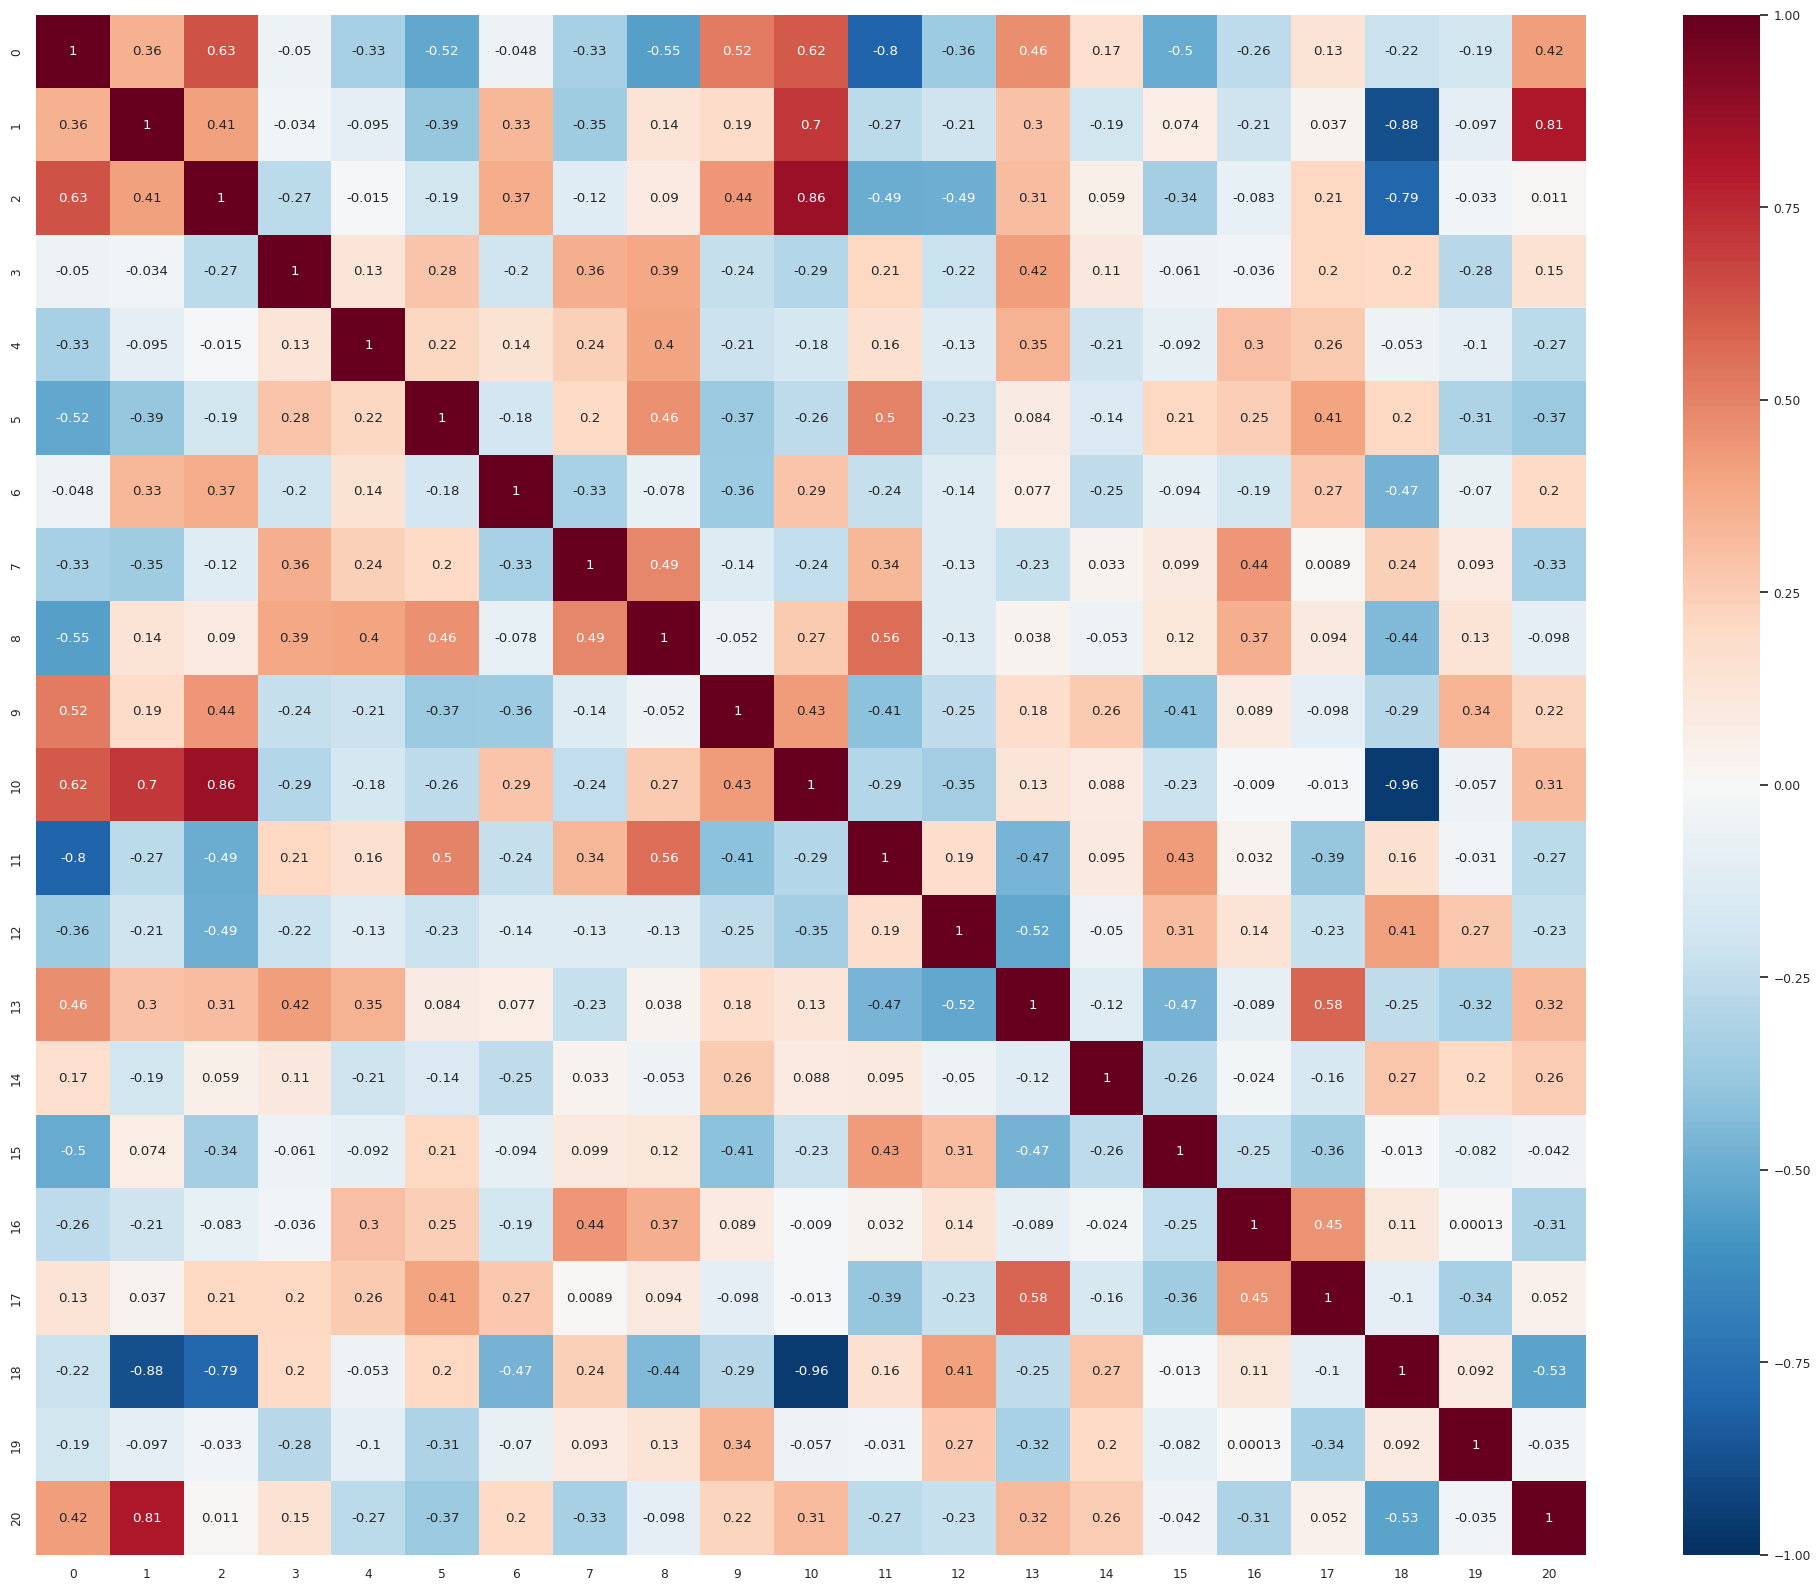

In [ ]:
sns.set(font_scale=0.8)
plt.figure(figsize=(25,20))
sns.heatmap(
    pd.DataFrame(X_select).corr(),
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.

In [ ]:
# X_ar = pd.DataFrame(np.transpose(X))
# X_ar

In [ ]:
# corr_matrix = X_ar.corr()
# corr_matrix = np.round(corr_matrix, 1)
# corr_matrix[np.abs(corr_matrix) < 0.3] = 0
# corr_matrix

In [ ]:
# sns.set(font_scale=0.8)
# plt.figure(figsize=(25,20))
# sns.heatmap(
#     pd.DataFrame(np.transpose(X_ar)).corr(),
#     cmap='RdBu_r', # задаёт цветовую схему
#     annot=True, # рисует значения внутри ячеек
#     vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.

In [ ]:
multi_output_clf = MultiOutputRegressor(LinearRegression())
multi_output_clf.fit(pd.DataFrame(np.transpose(X)).values.reshape(-1, 1), pd.DataFrame(np.transpose(y)).values.reshape(-1, 1))

In [ ]:
array = X.values()
x = array[:,5:] # dataframe --> массив numpy
y = array[:,5:]
# извлечение признаков
model = ExtraTreesClassifier()
model.fit(x, y) # обучение
for i in range(len(names)-1):
    print(f"{names[i]}\t- {model.feature_importances_[i]:.4f}")